In [351]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams["figure.figsize"] = (20,5)

In [352]:
dataframe_promo = pd.read_csv(r"C:\Users\isaia\Desktop\train_data_springboard.csv")

print(dataframe_promo.describe())
print(dataframe_promo.info())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service   awards_won?  avg_training_score   is_promoted  
count       54808.000000  54808.000000        54808.000000  54808.000000  
mean            5.865512      0.023172           63.386750      0.085170  
std             4.265094      0.150450           13.371559      0.279137  
min            

In [97]:
nonwork_related_factors = ["education", "gender", "age"]
work_related_factors = ["department", "region", "no_of_trainings", "previous_year_rating", "length_of_service", "awards_won?", "avg_training_score"]

## Data Cleansing

C:\Users\isaia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

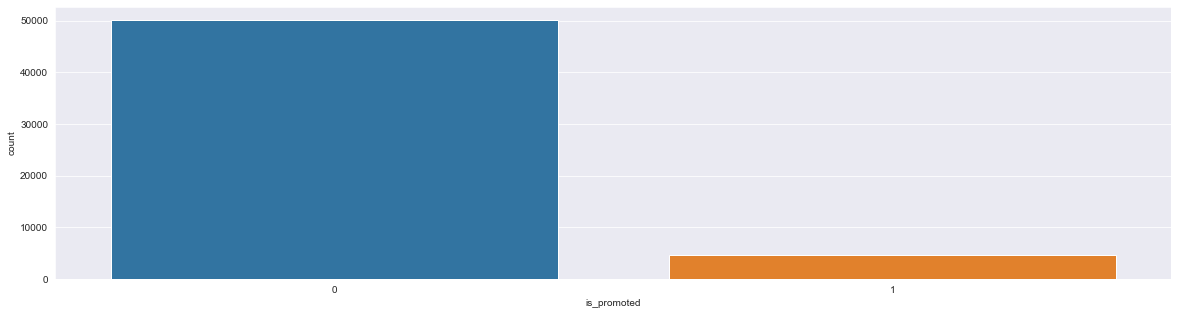

In [98]:
sns.countplot(dataframe_promo.is_promoted)

### Reduce total number of employees to the top 5% of eligible candidates for promotions

### Work Related Factors

* Department
* Region
* Number of Trainings
* Previous Year Rating
* Length of Service
* Awards Won
* Average Training Score

#### Department and Promotion Predictability

In [310]:
def predictability_finder(category,dataframe_promo):
    #todo change column to variable from list hint  (for loop)
    ds_employees = dataframe_promo.groupby([category])["employee_id"].count()
    ds_promos = dataframe_promo.groupby([category])["is_promoted"].sum()
    
    df_predictability= pd.concat([ds_employees,ds_promos],axis=1).reset_index()
    df_predictability["predictability"] = df_predictability["is_promoted"] / df_predictability["employee_id"] 
    
    # Create a bar chart predictability vs category verable
    #sns.barplot(x=category, y=df_predictability["predictability"], data=dataframe_promo, errwidth=0, ci=None)
   
    #return  top 5% categories
    if df_predictability.shape[1]*.05 < 3:
        head = 3
    else:
        head = int(df_predictability.shape[1]*.05)
        
    return df_predictability.sort_values("predictability", ascending=False).head(head)

In [311]:
# create list of columns and use a for loop to call the best_predictability_getter
work_related_factors = ["department", "region", "no_of_trainings", "previous_year_rating", "length_of_service", "awards_won?", "avg_training_score"]

for x in work_related_factors:
    print(predictability_finder(x, dataframe_promo))

    department  employee_id  is_promoted  predictability
8   Technology         7138          768        0.107593
5  Procurement         7138          688        0.096386
0    Analytics         5352          512        0.095665
       region  employee_id  is_promoted  predictability
28   region_4         1703          246        0.144451
8   region_17          796          109        0.136935
17  region_25          819          103        0.125763
   no_of_trainings  employee_id  is_promoted  predictability
0                1        44378         3910        0.088107
1                2         7987          605        0.075748
2                3         1776          122        0.068694
   previous_year_rating  employee_id  is_promoted  predictability
4                   5.0        11741         1921        0.163615
3                   4.0         9877          784        0.079376
2                   3.0        18618         1355        0.072779
    length_of_service  employee_id  is_p

In [312]:
def promotions_per_factor(factor, dataframe_promo):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=factor, data=dataframe_promo, palette="viridis",
                  hue="is_promoted", order = dataframe_promo[factor].value_counts().iloc[:10].index)
    ax.grid(False)
    for fact in ax.patches:
        ax.annotate('{:.1f}'.format(fact.get_height()), (fact.get_x()+0.1, fact.get_height()+0.01))
    plt.suptitle("Promotions In "+ factor)
    plt.show()
    

In [313]:
def nonwork_work_promo(nonwork_fact, work_fact):
    sns.catplot(x=nonwork_fact, y="is_promoted", hue=work_fact, kind="bar",
               data=dataframe_promo, height=7, aspect=2)

In [314]:
def bar_plot(cat, dataframe_promo):
    sns.barplot(x=cat, y="is_promoted", data=dataframe_promo, ci= None, palette="YlGnBu")

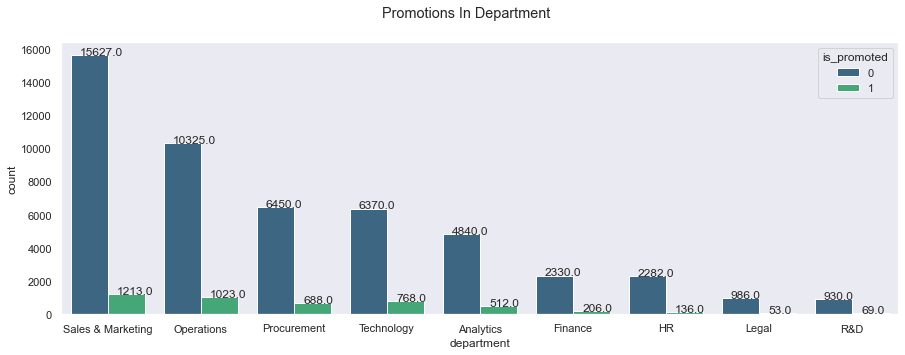

In [316]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="department", data=dataframe_promo, palette="viridis",
                  hue="is_promoted", order = dataframe_promo["department"].value_counts().index)
ax.grid(False)
for fact in ax.patches:
    ax.annotate('{:.1f}'.format(fact.get_height()), (fact.get_x()+0.1, fact.get_height()+0.01))
plt.suptitle("Promotions In Department")
plt.show()

In [317]:
predictability_finder("department", dataframe_promo)

,department,employee_id,is_promoted,predictability
8,Technology,7138,768,0.107593
5,Procurement,7138,688,0.096386
0,Analytics,5352,512,0.095665


<AxesSubplot:xlabel='department', ylabel='Count'>

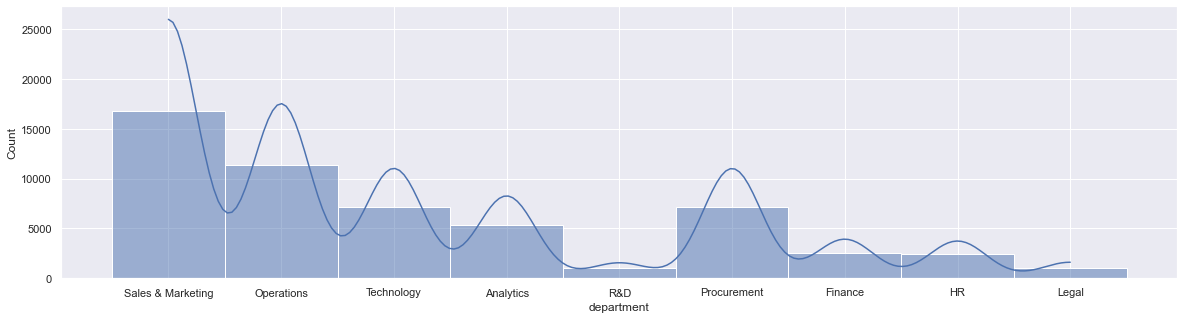

In [229]:
sns.histplot(dataframe_promo["department"], kde=True, bins=10)

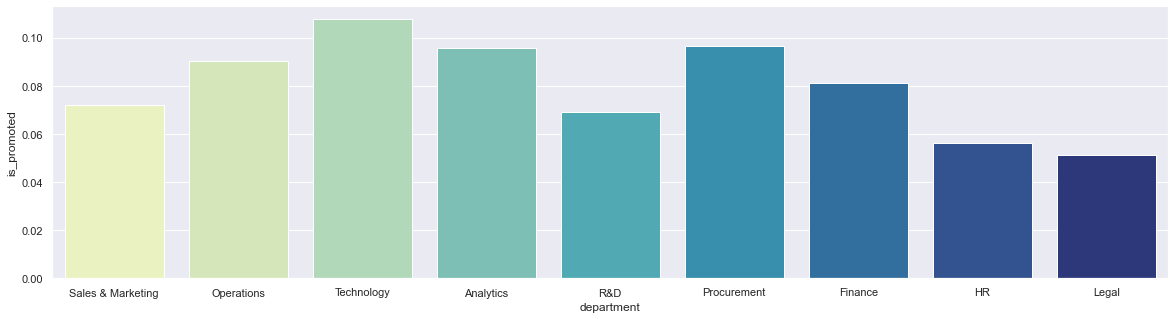

In [318]:
bar_plot("department", dataframe_promo)

#### Region and Promotion Predictability


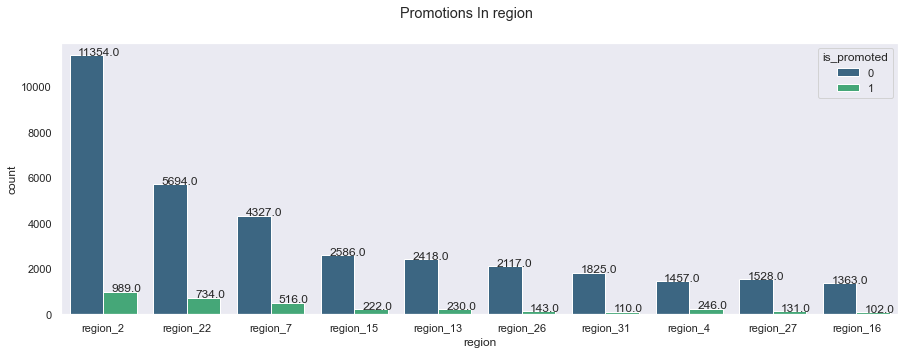

In [231]:
promotions_per_factor("region", dataframe_promo)

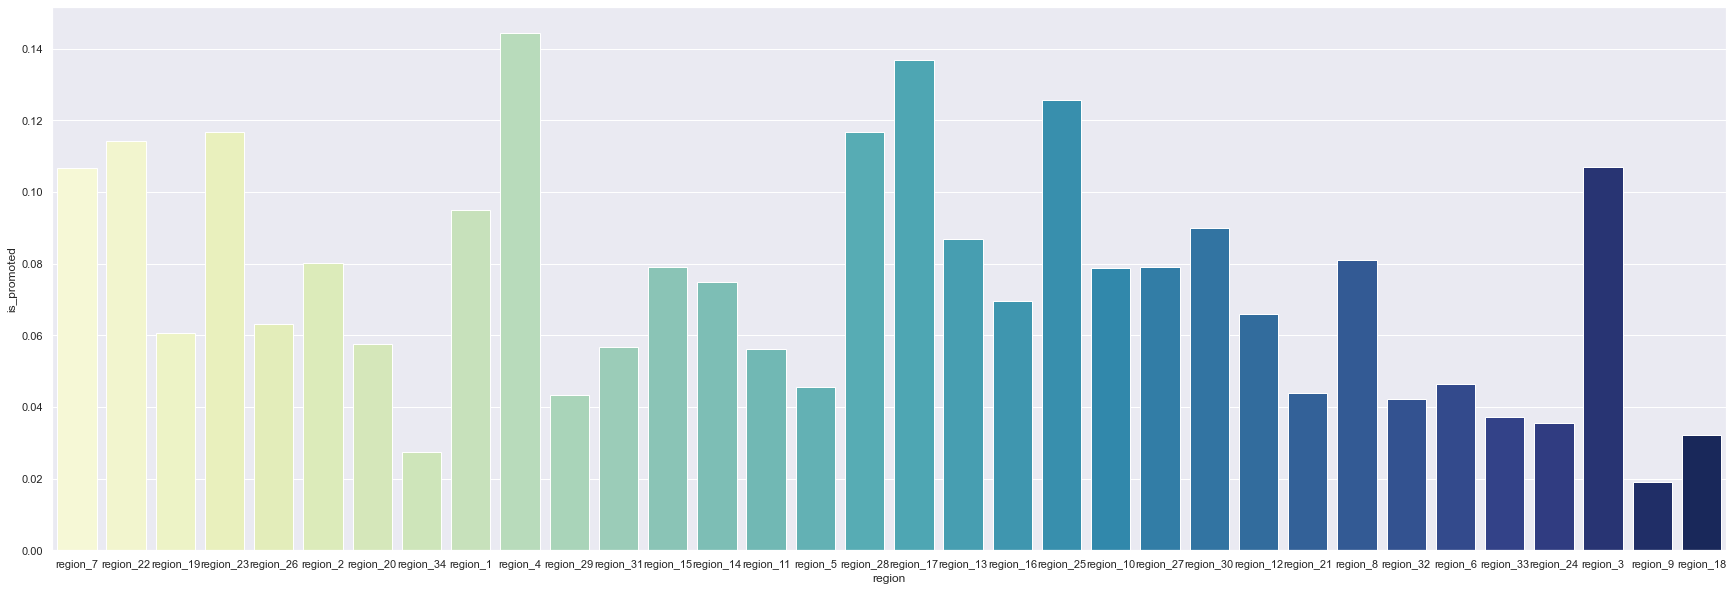

In [322]:
plt.figure(figsize=(30,10))
bar_plot("region", dataframe_promo)

In [320]:
predictability_finder("region", dataframe_promo)

,region,employee_id,is_promoted,predictability
28,region_4,1703,246,0.144451
8,region_17,796,109,0.136935
17,region_25,819,103,0.125763


#### Number of Trainings and Promotion Predictability

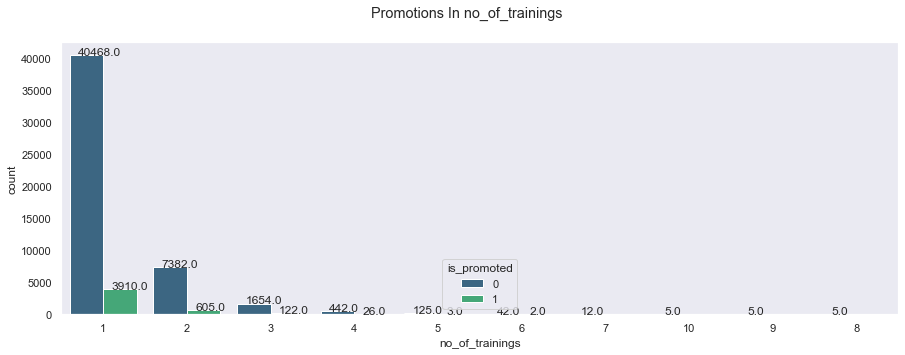

In [233]:
promotions_per_factor("no_of_trainings", dataframe_promo)

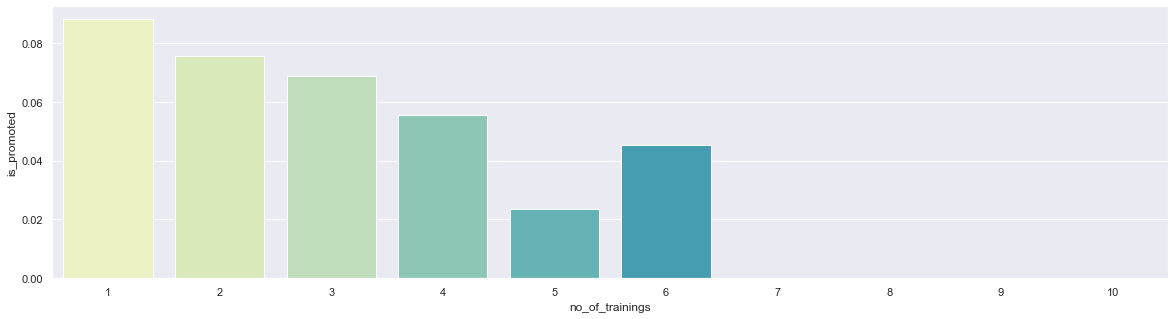

In [234]:
bar_plot("no_of_trainings", dataframe_promo)

#### Previous Year Rating and Promotion Predictability

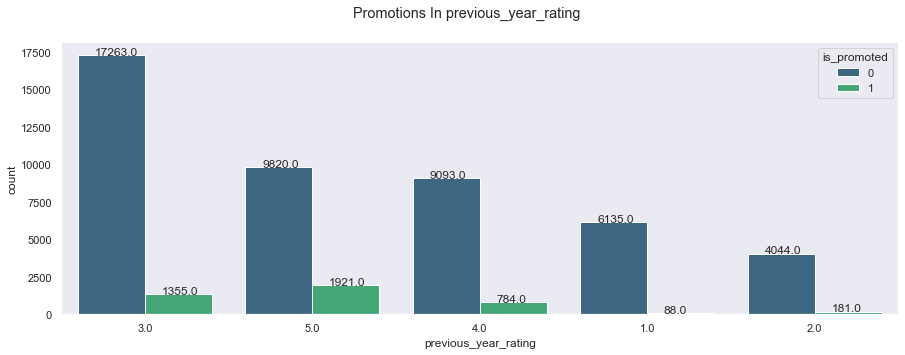

In [235]:
promotions_per_factor("previous_year_rating", dataframe_promo)

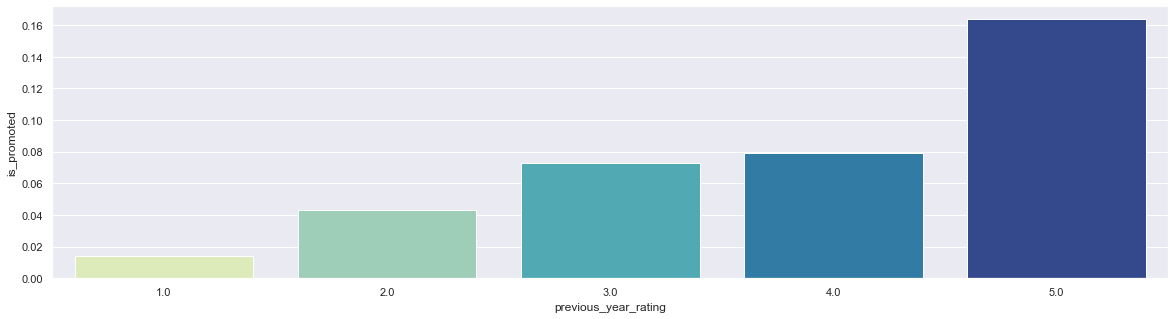

In [323]:
bar_plot("previous_year_rating", dataframe_promo)

#### Length of Service and Promotion Predictability

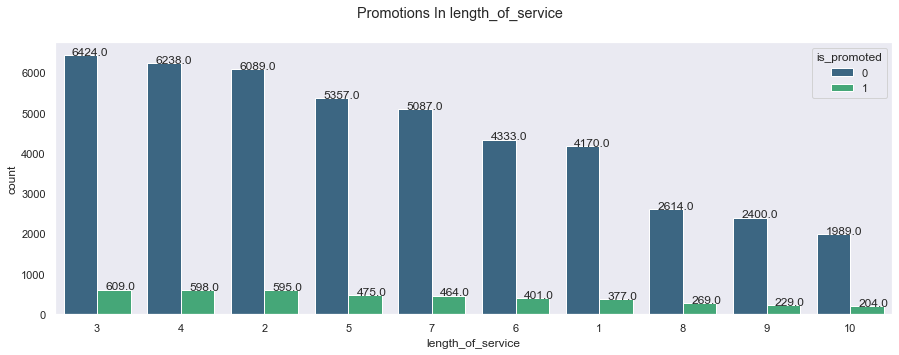

In [237]:
promotions_per_factor("length_of_service", dataframe_promo)

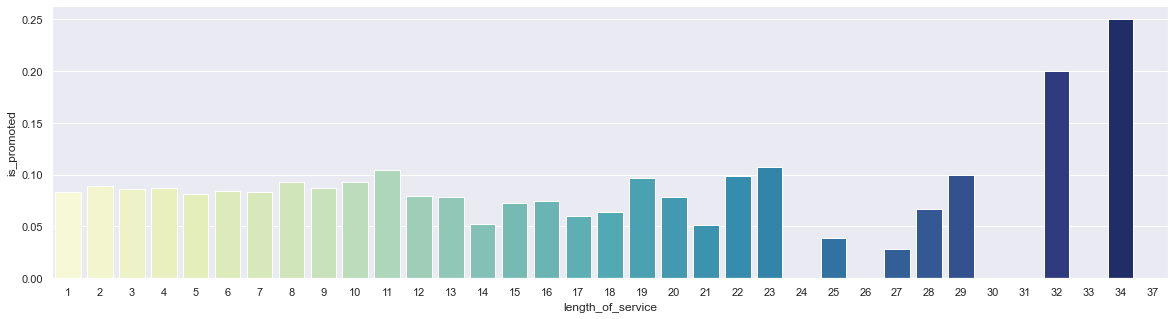

In [238]:
bar_plot("length_of_service", dataframe_promo)

#### Awards Won and Promotion Predictability

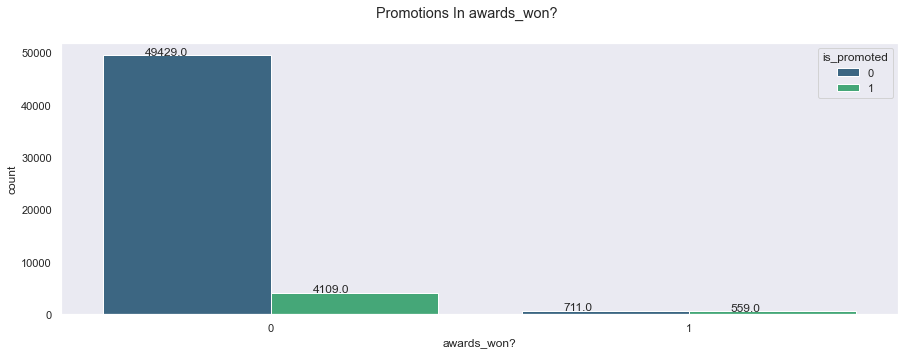

In [239]:
promotions_per_factor("awards_won?", dataframe_promo)

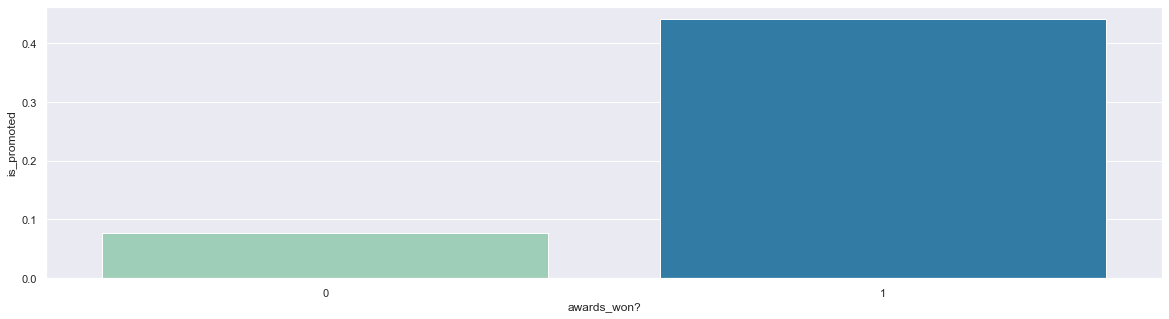

In [240]:
bar_plot("awards_won?", dataframe_promo)

#### Average Training Score and Promotion Predictability

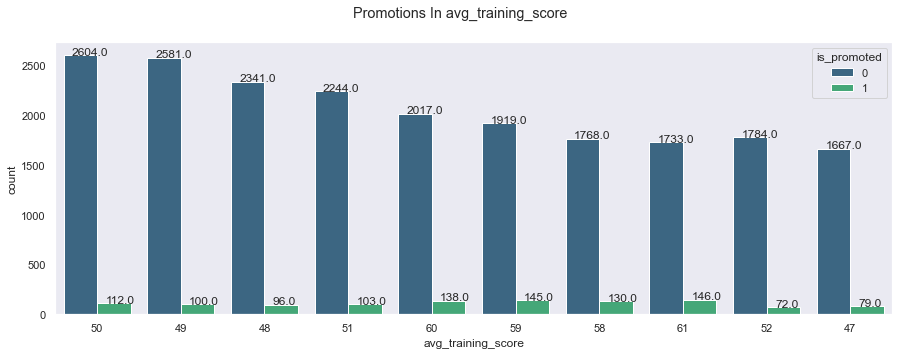

In [241]:
promotions_per_factor("avg_training_score", dataframe_promo)

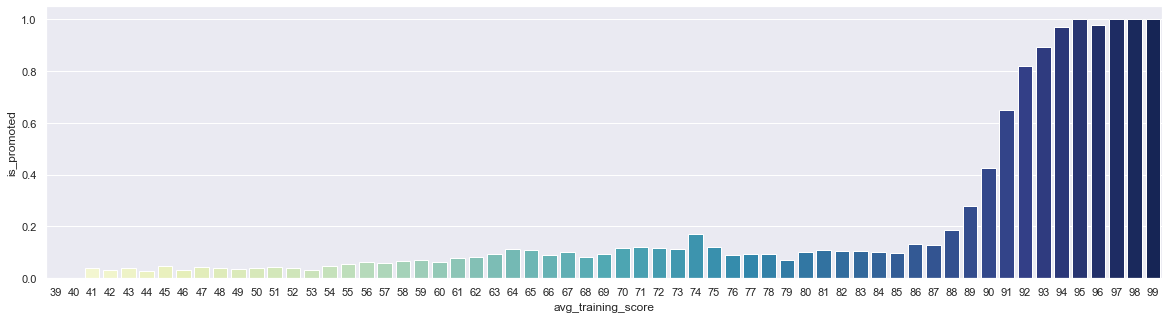

In [242]:
bar_plot("avg_training_score", dataframe_promo)
# remove line from bars

### Non-Work Related Factors

* Education
* Gender
* Age

In [325]:
nonwork_related_factors = ["education", "gender", "age"]

for x in nonwork_related_factors:
    print(predictability_finder(x, dataframe_promo))

          education  employee_id  is_promoted  predictability
2  Master's & above        14925         1471        0.098559
1   Below Secondary          805           67        0.083230
0        Bachelor's        36669         3008        0.082031
  gender  employee_id  is_promoted  predictability
0      f        16312         1467        0.089934
1      m        38496         3201        0.083151
    age  employee_id  is_promoted  predictability
15   35         2711          283        0.104390
13   33         3210          319        0.099377
8    28         3147          308        0.097871


#### Education and Promotion Predictability

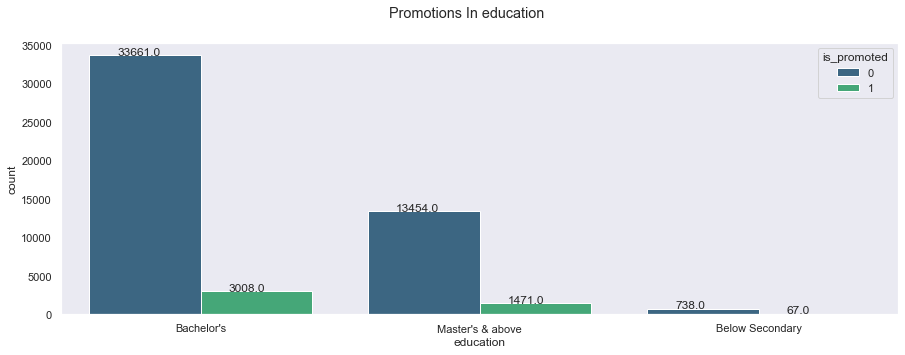

In [326]:
promotions_per_factor("education", dataframe_promo)

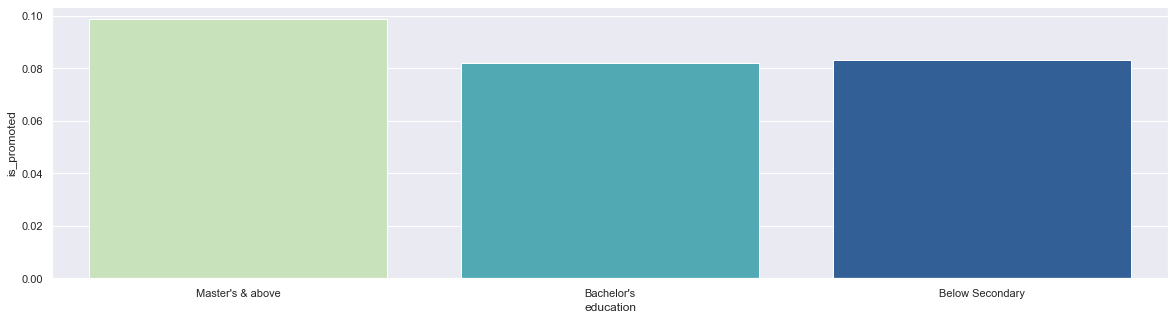

In [327]:
bar_plot("education", dataframe_promo)

#### Gender and Promotion Predictability

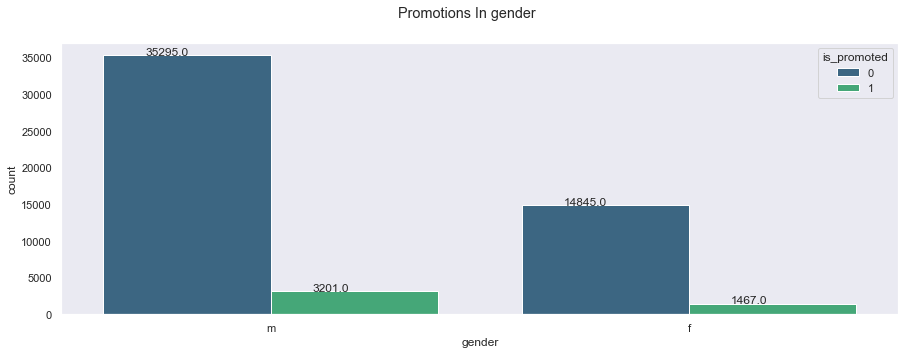

In [328]:
promotions_per_factor("gender", dataframe_promo)

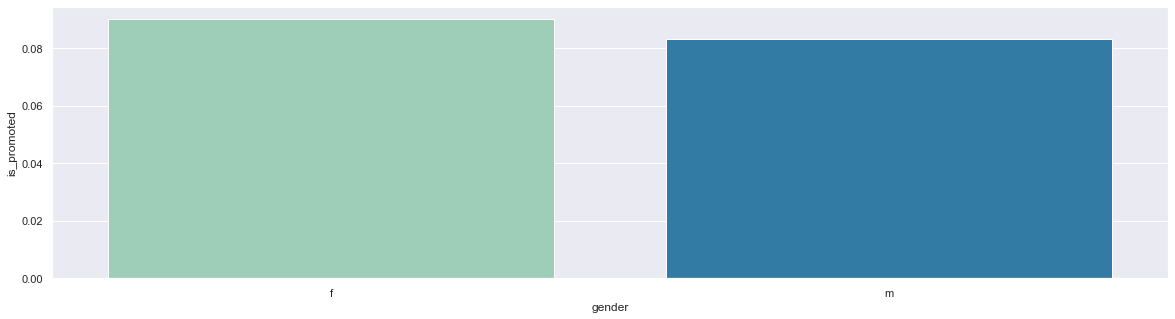

In [329]:
bar_plot("gender", dataframe_promo)

#### Age and Promotion Predictability

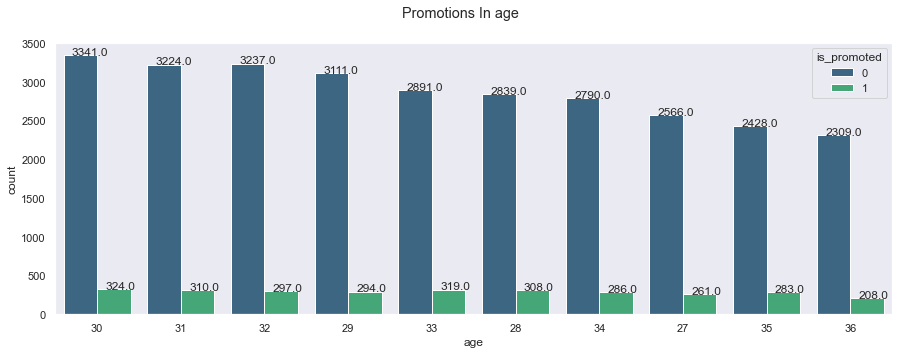

In [330]:
promotions_per_factor("age", dataframe_promo)

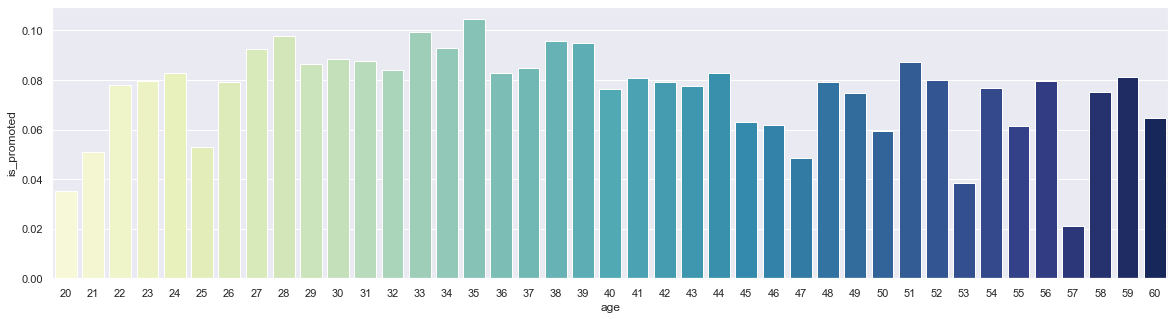

In [331]:
bar_plot("age", dataframe_promo)

## Insights

<AxesSubplot:>

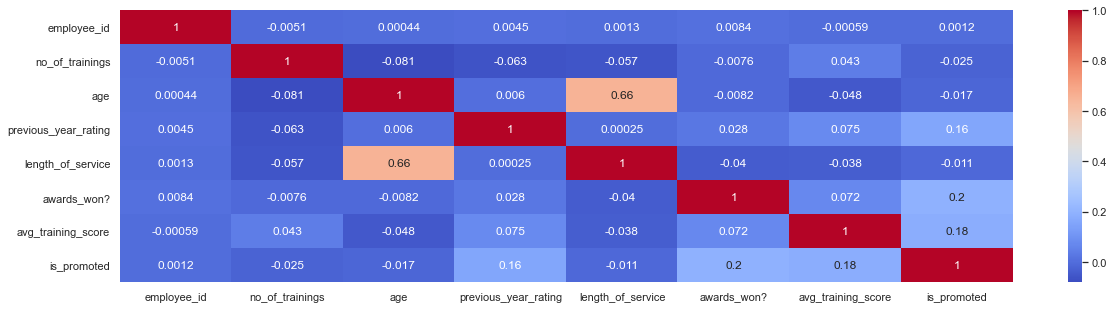

In [332]:
sns.heatmap(dataframe_promo.corr(), annot=True, cmap="coolwarm")

### The Top 5% of Predictable Work Related Factors with Their Corresponding Categories
* Departments: Technology, Procurment, Analytics
* Regions: region_4, region_17, region_25
* Number of trainings: 1, 2, 3
* Previous year ratings: 5.0, 4.0, 3.0
* Length of Service: 34, 32, 23
* Awards Won: Yes
* Average Training Scores: 99, 98, 97

### The Top 5% of Predictable Nonwork Related Factors with Their Corresponding Categories
* Education: Master's & above, Below Secondary, Bachelor's
* Gender: Female, Male
* Age: 35, 33, 28